In [9]:
import sys
sys.path.append("..")
import os
import numpy as np
#from LowLevelModules.GeneralFunctions import TRMData
from LowLevelModules.ImportSDT import SdtFile
import ipywidgets as widgets
from IPython.display import display

class TRMData(SdtFile):
    def __init__(self, path):
        super().__init__(path)
        self.time = self.times[0]
        self.info = self.measure_info[0]
        self.x = self.time*1e9
        self.y = self.data[0][0]
        self.bin_size = (self.time[-1]-self.time[0])/(len(self.time)-1)

        #trim data
        lims = [1.6, 12.25]
        self.y = self.y[self.x>lims[0]]
        self.x = self.x[self.x>lims[0]]
        self.y = self.y[self.x<lims[1]]
        self.x = self.x[self.x<lims[1]]
#         self.y = self.y[self.y>0]
#         trim = -1 * int(len(self.y)*0.04)
        print(len(self.y), len(self.x))
#         self.x = self.x[:trim]
#         self.y = self.y[:trim]
        
        #shift x axis
#         self.x -= self.x[0]

        #count rate
        info_ctr = self.info['StopInfo']
        min_sync_rate = info_ctr['min_sync_rate'][0]
        min_cfd_rate = info_ctr['min_cfd_rate'][0]
        min_tac_rate = info_ctr['min_tac_rate'][0]
        max_sync_rate = info_ctr['max_sync_rate'][0]
        max_cfd_rate = info_ctr['max_cfd_rate'][0]
        max_tac_rate = info_ctr['max_tac_rate'][0]
        self.col_t = info_ctr['stop_time'][0]

        self.APD1_rate = (min_cfd_rate + max_cfd_rate) / 2
        self.APD1_rate_alt = (min_tac_rate + max_tac_rate) / 2
        self.laser_rep_rate = (min_sync_rate + max_sync_rate) / 2
        self.APD2_rate = self.laser_rep_rate
        
        #normalization
        self.total_counts = np.sum(self.y)  
        
wdir = r"Z:\Sharing\Raphael2Raphael\Lifetime_test"

filenames = [f[:-4] for f in os.listdir(wdir) if '.sdt' in f]
filenames

['background_2020_02_12', 'IRF_mira_60kHz', 'WSe2_5K_pulsed780_14uW']

In [10]:
for f in filenames:
    sdt_data_path = wdir + '//' + f + '.sdt'
    data = TRMData(sdt_data_path)
    data_array = np.array([data.x, data.y]).T
    np.savetxt(f"{wdir}/{f}.txt", data_array)
    useful_info = ('col_t', 'bin_size', 'total_counts', 'APD1_rate', 'APD2_rate', 'laser_rep_rate')
    with open(f"{wdir}/{f}_extra_info.txt", 'w') as f:
        for ei in useful_info:
            f.write(f'\n {ei} {getattr(data, ei)}')

2616 2616
2616 2616
2616 2616


<IPython.core.display.Javascript object>


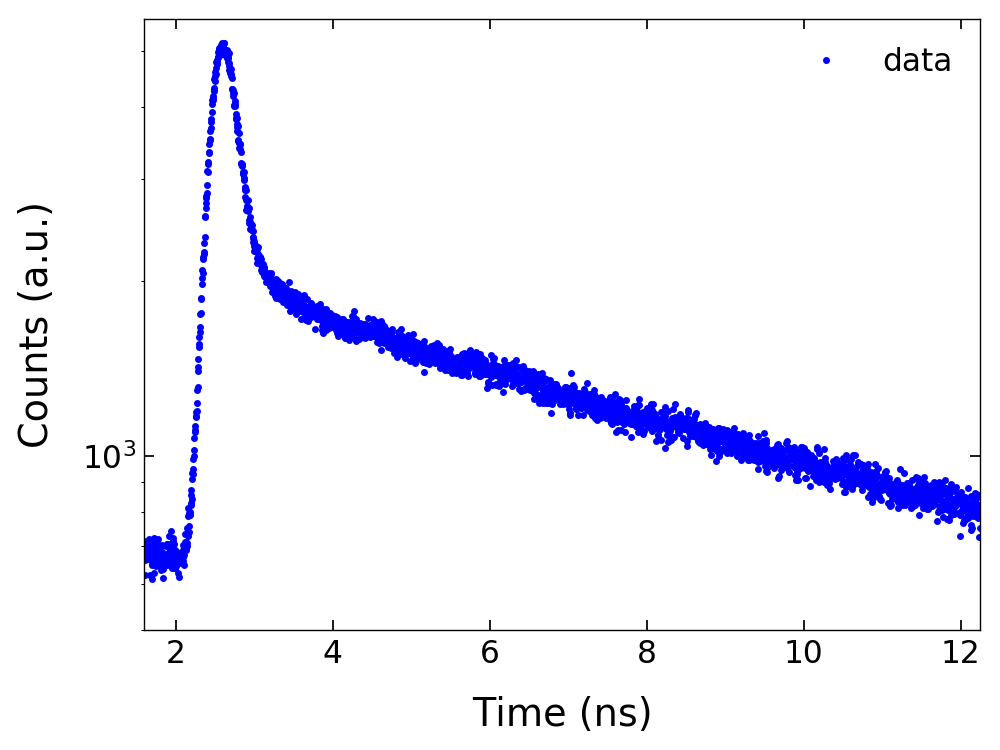

In [8]:
from LowLevelModules.GeneralFunctions import MyPlot
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

pl = MyPlot(1, 1, xlabel='Time (ns)', ylabel='Counts (a.u.)')
pl.semilogy(data.x, data.y, 'bo', markersize=3, label='data')
pl.ax.set_ylim([500, 1.1*np.max(data.y)])
pl.ax.legend(prop={'size': 18}, frameon=False)
# pl.ax.text(8, 0.4*np.max(data.y), f"γf = {np.round(coeffs[1],2)} ns-1", size='x-large')
# pl.ax.text(8, 0.3*np.max(data.y), f"γs = {np.round(coeffs[3],2)} ns-1", size='x-large')
plt.tight_layout()